In [1]:
import sys
sys.path.append('.src/')

##import some packages

local packages

In [2]:
from src.experiment_class import Koopman_iteration_accelerator
from src.vqe_utilities import build_ham,build_ansatz,ising_value_fn
from src.iteration_generators import Generate_iterations,ising_vqe_its_generator
from src.koopman_iteration_generators import Generate_koopman_iterations,dmd_iteration_generator_predict_from_future_steps,hankeldmd_iteration_generator_predict_from_future_steps

other packages

In [3]:
import mindspore as ms
from mindquantum.simulator import Simulator
from mindspore.nn import Adam
from functools import partial
import numpy as np

## global variables

random seed

In [4]:
seed = 42
np.random.seed(seed)
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")
ms.set_seed(seed)

set arguments

In [5]:
num_qubits = 12
h = 0.5
x_init = np.random.random(2*num_qubits)
num_iters = 9
num_iters_koopman = 40
num_pieces = 6
order = 6
optimizer_fn = Adam
lr = 0.01
sim = Simulator('mqvector',num_qubits)
ham = build_ham(num_qubits,h)
ansatz = build_ansatz(num_qubits,'theta')
value_fn = partial(ising_value_fn,ham=ham,simulator=sim,ansatz=ansatz)
args_1 = (optimizer_fn,lr,sim,ham,ansatz)
args_2_dmd = (num_iters_koopman,)
args_2_hankeldmd = (num_iters_koopman,order)
ansatz.summary()
ansatz.svg()

==============================================Circuit Summary==============================================
|Total number of gates  : 38.                                                                             |
|Parameter gates        : 24.                                                                             |
|with 24 parameters are :                                                                                 |
|theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9..                        .|
|Number qubit of circuit: 12                                                                              |


<ipython-input-5-4c56002e28b3>:10: DeprecationWarning: mqvector will be deprecated in next version, please use mqvector.
  sim = Simulator('mqvector',num_qubits)


## experiment

set_it_generator is executed.
set_koopman_generator is executed.
set_koopman_generator is executed.
set_shared_args is executed.


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 306473184.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----1/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 3928827.25. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----2/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 6042503.5. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----3/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 315755.375. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----4/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 110396.15625. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----5/6
start_accelerated_iteration-----6/6
start_accelerated_iteration is executed.


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 366108.59375. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----1/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 1692771.875. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----2/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 11636723.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----3/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 556345.25. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----4/6


/usr/local/lib/python3.8/dist-packages/pydmd/dmdbase.py:715: UserWarning: Input data matrix X has condition number 115125.1875. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


start_accelerated_iteration-----5/6
start_accelerated_iteration-----6/6
start_accelerated_iteration is executed.
start_raw_iteration is executed.


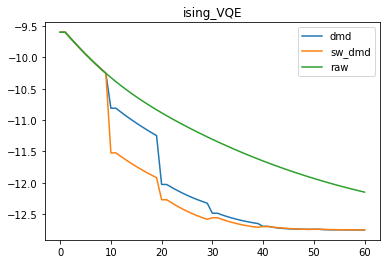

plot_value_results is executed.


In [6]:
ising_accelerator = Koopman_iteration_accelerator('ising_VQE')
ising_accelerator.set_it_generator(None,ising_vqe_its_generator)
ising_accelerator.set_koopman_generator('dmd',dmd_iteration_generator_predict_from_future_steps)
ising_accelerator.set_koopman_generator('sw_dmd',hankeldmd_iteration_generator_predict_from_future_steps)
ising_accelerator.set_shared_args(x_init,num_iters,num_pieces,value_fn,args_1)
ising_accelerator.start_accelerated_iteration('dmd',args_2_dmd)
ising_accelerator.start_accelerated_iteration('sw_dmd',args_2_hankeldmd)
ising_accelerator.start_raw_iteration()
ising_accelerator.plot_value_results()

’raw‘曲线代表full_vqe，可以发现dmd类方法对训练过程有明显的加速效果。在实验中我们设定每走十步便对参数序列做一次Koopman学习，选取新的迭代初始点。图中可以明显发现与dmd方法相关的两条曲线每走十步都会有一次跌落式下降，且sw_dmd比dmd下降得更快。